# Projeto Final De 'Drug Discovery' Alura Imersão Dados

### 'Drug Discovery', o que é:

'Drug Discovery' é o nome dado ao processo da busca por novos medicamentos, provavelmente essa busca é um dos processos mais antigos da sociedade, historicamente sabe se que o ser humano sempre buscou substâncias que de alguma forma aliaviassem sintomas ou tratassem doenças. O fato das plantas medicianis descobertas pelos próprios indígenas brasileiros é um fator que corrobora com essa informação, uma vez que diversas sociedades indígenas não possuem acesso aos medicamnetos e utilizam diversas ervas para tratar sintomas

Um fator que contribuiu para evolução dessa descobertas de novos compostos foi a  ideia de que substâncias químicas individuais são necessárias para a atividade biológica do medicamento, isso marcou o início da era moderna em farmacologia, uma vez que começaram a ser utilizados produtos químicos puros em vez de extratos brutos de plantas medicinais, dessa forma tornando o padrão o estudo separado de casa subsância pura a fim de maximizar a eficiência do medicamento e ao mesmo tempo minimizar os efeitos indesejados.

Esse processo de encontrar um novo medicamento para uma doença específica envolve a produção de um "alvo" na indústria farmacêutica.Geralmente, o alvo é a estrutura celular ou molecular naturalmente existente envolvida na patologia de interesse onde o composto deve agir, esse processo passa por uma análise em que grandes bibliotecas de produtos químicos são testadas quanto à sua capacidade de modificar os genes. Por exemplo, dependendo do alvo, os compostos serão rastreados quanto à sua capacidade de inibir, estimular, bloquear, ou realizar outras ações em determinados receptores testados.

"A aplicação de ferramentas de ciência de dados na área da saúde, especialmente para a descoberta de medicamentos, tem um enorme potencial para mudar sistematicamente todas as práticas e métodos existentes", essa frase foi dita por Aarthi Janakiraman, Gerente de Pesquisa de Insights Técnicos da Frost & Sullivan.

Como a ciência de dados pode ajudar:

   -Usando Inteligência Artificial para terapêutica e triagem, pois fornece acesso a uma grande biblioteca de compostos e pode diminuir o risco de toxicidade inesperada ou efeitos colaterais nos testes realizados em humanos

 -Modernizando os ensaios clínicos para maximizar a eficiência dos ensaios e reduzir custos

 -Facilitar as análises e filtrar os compostos de acordo com o alvo proposto na pesquisa

 -A partir desses fatores diminuir o tempo que leva para descoberta desse medicamnetos

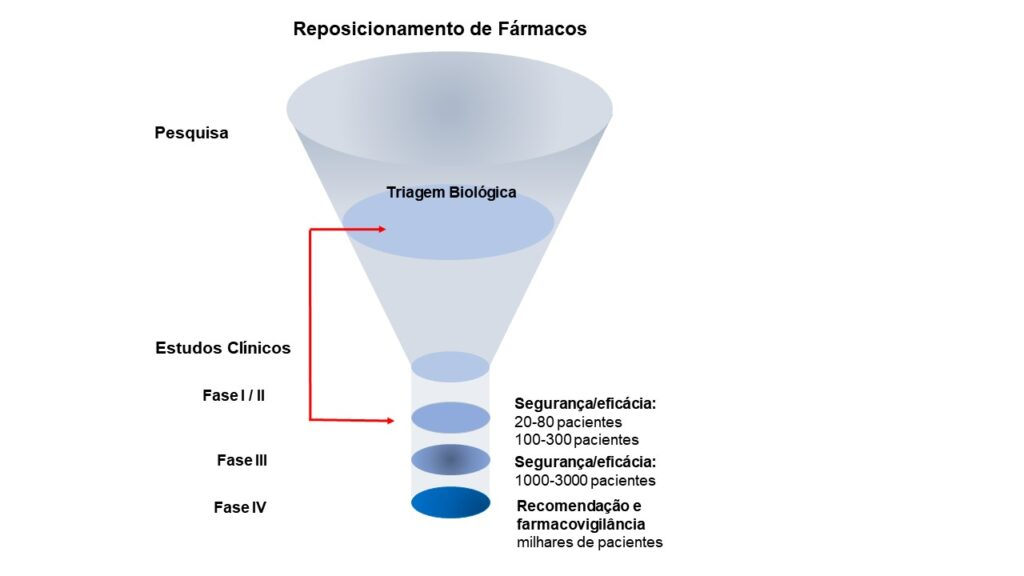

In [171]:
from IPython.display import Image
filename = 'Fig-Drug-discovey.jpg'
Image(filename = filename, width=1000, height=1000)

# Escopo do projeto

#### Descrição dos dados

Nesse projeto serão utilizados dois arquivos, um contendo dados sobre os experimentos realizados com diversos compostos e informações sobre expressões gênicas(g0-g771) e viabilidade celular(c0-c99), e outro contendo as informações dos resultados desses experimentos e quais mecanismos de ações esses compostos ativaram.

#### Objetivos

-Entender a proporção dos experimentos em relação as variáveis categóricas 

-Entender a distribuição das variáveis numéricas(expressões gênicas e viabilidade celular) 

-Achar as correlações entre as expressões gênicas e viabilidade celular

-Estudar os diferentes tipos de mecanismos de ação e quais são os mais frequentes

-Criar um modelo de machine learnig para prever se determinado experimento ativou ou não mecanismos de ação

-Criar um modelo de machine learnig para prever se determinado experimento teve ação de algum composto ou não

#### Etapas

1-Importações

    1.1-Importação Dos Pacotes

    1.2-Importação Dos Dados

2-Análise Exploratória e Limpeza Dos Dados

    2.1-Análise e Limpeza Dos Dados (dados dos experimentos)

        2.1.1-Análise variáveis categóricas

        2.1.1-Análise variáveis numéricas

    2.2-Análise e Limpeza Dos Dados (dados dos resultados)

3-Juntar os dados do experimento e resultado

4-Modelo de Machine Learning

    4.1-Modelo de predição se ativou ou não ativou algum MOA

        4.1.1-Definição do problema

        4.1.2-Testes dos modelos(dummy classifier, regressão logística, árvore de decisão, random forest, SVC)

        4.1.3-Escolha do modelo(analisando as métricas de acurácia e f1 score )

    4.2-Modelo de predição para prever o tipo de tratamento

        4.2.1-Definição do problema

        4.2.2-Testes dos modelos(dummy classifier, regressão logística, árvore de decisão, random forest, SVC)

        4.2.3-Escolha do modelo(analisando as métricas de acurácia e f1 score )

5-Conclusões

# 1-Importações

## 1.1-Importação Dos Pacotes

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import  roc_auc_score, classification_report, confusion_matrix, f1_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## 1.2-Importação Dos Dados

In [131]:
url_exp = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
url_result = 'https://github.com/Pedro-correa-almeida/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados_exp = pd.read_csv(url_exp, compression = 'zip')
dados_result = pd.read_csv(url_result)

# 2-Análise Exploratória e Limpeza Dos Dados

## 2.1-Análise e Limpeza Dos Dados (dados dos experimentos)

Primeira coisa a se fazer após importar os dados é verificar se há algum valor faltando.

In [4]:
dados_exp.isna().values.any()

False

Vemos que os dados não apresentam valores faltando.

In [5]:
dados_exp.shape

(23814, 877)

Analisando o shape da tabela foi localizado dados de 23814 experimentos com 877 atributos(colunas)

In [6]:
dados_exp.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Analisando as 5 primeiras linhas da tabela nota se que as 5 primeiras colunas são categóricas e dizem respeito a natureza do experimento, e as demais são numéricas

In [7]:
#Retirando o hífen do nome das colunas para evitar problemas ao tratar os dados
dados_exp.columns = dados_exp.columns.str.replace('-', '_')

In [8]:
#Mudando o nome droga por composto
dados_exp.rename(columns = {'droga':'composto'}, inplace=True)

In [9]:
dados_exp.sample(10)

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
18757,id_c97c3afdc,com_droga,24,D1,f2cd513d6,-0.7401,-0.1176,-1.7270,0.1834,-0.6369,...,0.1091,0.9155,0.6915,1.1930,1.3360,1.6880,0.8238,-0.2149,0.1988,0.5920
6335,id_440634bb0,com_droga,24,D2,c8682a165,0.4008,0.0870,-0.2864,0.2857,-0.2363,...,0.3805,-0.4904,-0.5107,0.3580,-0.6262,0.2156,-0.9205,-2.3040,-1.1640,-1.0240
20144,id_d847fe582,com_droga,48,D1,28879e19e,8.4930,-3.4540,0.3318,2.7520,2.4390,...,-8.5180,-8.2200,-8.2210,-10.0000,-10.0000,-5.0360,-9.5720,-5.2830,-9.7070,-6.9250
20274,id_d977d5e6c,com_droga,24,D2,2e28d6c72,0.0990,0.0336,-0.7435,-0.6895,-1.1290,...,0.0552,0.2704,-0.8481,-0.1435,0.3320,0.6569,-0.6912,-0.3374,-0.3757,-0.0247
5352,id_39b709dd6,com_droga,48,D1,c6b500c21,0.0840,-0.5198,0.9209,-0.8832,-0.3305,...,-0.6134,-1.4890,0.3171,-0.4226,-0.7210,-0.1683,0.3307,-0.4201,0.1429,0.1656
23672,id_fe6c35143,com_droga,24,D1,62ad50147,0.0428,-0.5133,-0.5453,0.4698,-1.2190,...,1.1720,0.7112,1.5300,0.8173,0.7614,-0.0090,0.6375,0.0564,0.9966,0.5954
16043,id_ac910a549,com_droga,24,D2,e3ab954cb,-0.7412,-0.3974,0.2799,-0.6896,-0.6310,...,-0.9739,0.1781,-0.1560,0.7450,0.5572,-0.7524,-0.0002,-0.4765,-1.1640,-0.7255
14075,id_978e29210,com_droga,72,D2,1908efe59,1.1270,1.5050,-0.6718,0.8593,1.0620,...,-0.4598,-1.0670,-0.1929,-0.4591,-0.2915,-0.5519,-1.7640,-1.6330,-0.5656,-0.8724
22307,id_ef6cd4807,com_droga,24,D2,5628cb3ee,0.4099,-0.6215,-0.2808,-0.5099,-0.0773,...,0.1365,0.6103,0.2535,0.3598,-0.3816,0.1229,1.0440,-0.2828,0.4912,0.4423
21528,id_e6d37d055,com_droga,24,D1,3997d81ed,-0.1109,-0.1236,-0.8654,0.0469,0.0654,...,0.6447,1.0460,-0.3633,0.1639,0.3970,1.0690,0.3007,0.3739,0.3370,0.5391


Observando os dados no formato de um tabela e pegando 10 linhas aleatórias percebemos que a coluna tratamento apresenta dois valores apenas ('com_droga' e 'com_controle'), para confirmar isso vou usar a função unique para retornar os valores únicos 

In [10]:
dados_exp['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Vemos que a hipótese está correta, essa coluna então nos indica quais são os experimentos que não foram submetidos a nenhum compostos, foram utilizados na verdade como forma de comparação e validação dos resultados, uma vez que precisa de uma maneira para provar que a ação foi relacionado ao composto e não à algum fator externo.Vamos entender a proporção desses experimentos em relação ao controle.

#### 2.1.1-Análise variáveis categóricas

Distribuição dos compostos

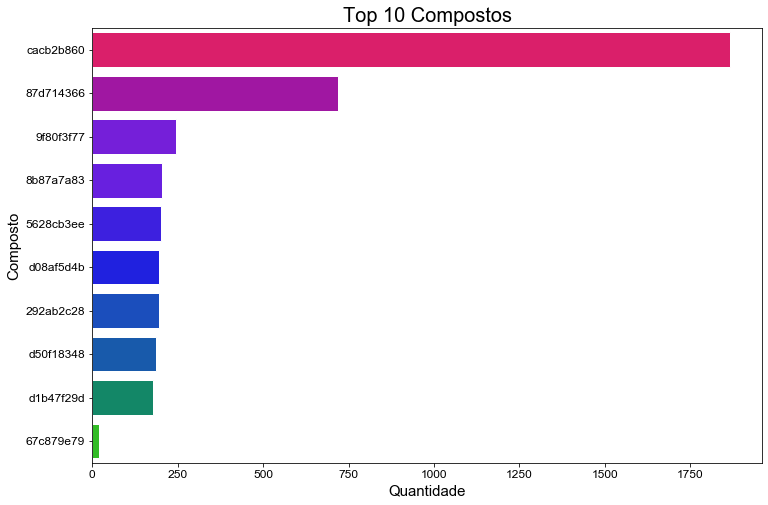

In [11]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("prism", 10))

#Criando o gráfico
sns.barplot(dados_exp['composto'].value_counts().values[:10], dados_exp['composto'].value_counts().index[:10], ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Top 10 Compostos', fontsize=20)
plt.xlabel('Quantidade', fontsize=15)
plt.ylabel('Composto', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Mostrando o gráfico
plt.show()

Nota se que o composto mais utilizado está muito a frente dos outros, uma desproporção muito grande, para descobrir o porque vamos estudar a classe tratamento

In [12]:
dados_exp.groupby(['tratamento', 'composto']).agg({'id':'count'})

id
tratamento   composto       
com_controle cacb2b860  1866
com_droga    00199ff52     6
             00251fc41     6
             00321ea80    12
             0034c0847     6
...                      ...
             ff9565933     6
             ffd66e220     6
             ffe357f8f     1
             ffed8e1c9     6
             fff7d208d     6

[3289 rows x 1 columns]

Podemos ver que esse composto na verdade é o único composto da classe com controle, a razão é porque na verdade esse código é ausência de composto, então faz sentido ser a mais utilizada já que sempre vai ser igual(a variável composto não varia)

In [13]:
#Criando outra tabela com a propoção da classe tratamento
prop_trat = dados_exp['tratamento'].value_counts(normalize=True).reset_index()
prop_trat.columns = ['tratamento', 'proporcao']
prop_trat

,tratamento,proporcao
0,com_droga,0.921643
1,com_controle,0.078357


Vou mostrar essa informação em um gráfico para ficar mais claro

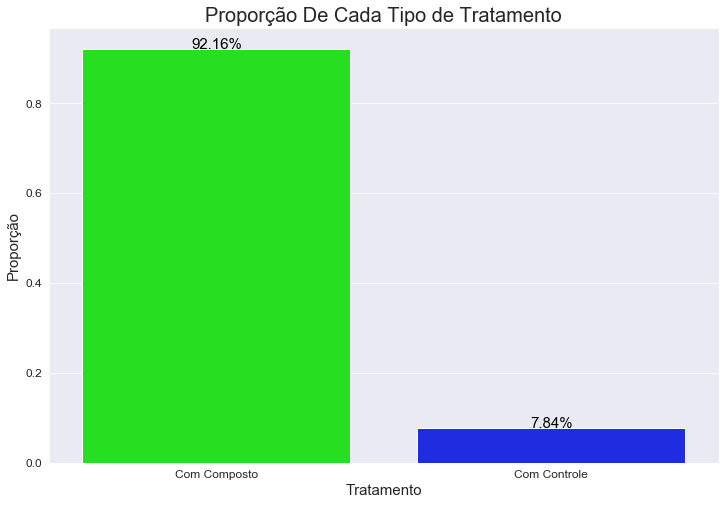

In [14]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("hsv", 2))

#Criando o gráfico 
sns.barplot(x='tratamento', y='proporcao', data=prop_trat, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
ax.set_xticklabels(labels= ['Com Composto', 'Com Controle'])
plt.title('Proporção De Cada Tipo de Tratamento', fontsize=20)
plt.xlabel('Tratamento', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)

#Adicionando os valores acima da barra
for index, row in prop_trat.iterrows():
    ax.text(index, row['proporcao'], str(round(row['proporcao'] * 100,2)) + '%', color='black', ha="center", fontsize=15)
    
#Mostrando o gráfico
plt.show()

Como era de se esperar temos muito mais experimentos que houve algum composto do que experimentos controle, uma vez que vc pode comparar diversos experimentos com compostos diferentes com o mesmo controle se as outras variáveis como tempo e dose se manterem as mesmas.

Vamos analisar agora as outras colunas categóricas para vermos a proporção de cada

In [15]:
#Criando outra tabela com a propoção da classe tratamento
prop_tempo = dados_exp['tempo'].value_counts(normalize=True).reset_index()
prop_tempo.columns = ['tempo', 'proporcao']
prop_tempo = prop_tempo.sort_values('proporcao', ignore_index=True)
prop_tempo

,tempo,proporcao
0,24,0.326363
1,72,0.327202
2,48,0.346435


In [16]:
#Criando outra tabela com a propoção da classe tratamento
prop_dose = dados_exp['dose'].value_counts(normalize=True).reset_index()
prop_dose.columns = ['dose', 'proporcao']
prop_dose = prop_dose.sort_values('proporcao', ignore_index=True)
prop_dose

,dose,proporcao
0,D2,0.489922
1,D1,0.510078


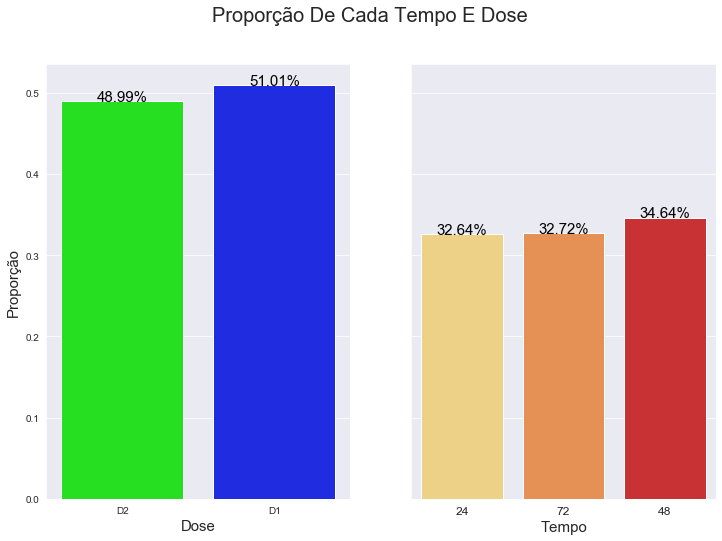

In [173]:
#Criando figura e eixos
fig, ax = plt.subplots(1,2,figsize=(12,8), sharey=True) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
palette1 = sns.color_palette('hsv', 2)
palette2 = sns.color_palette('YlOrRd', 3)

#Criando o gráfico 
sns.barplot(x='dose', y='proporcao', data=prop_dose, ax=ax[0], palette=palette1)
sns.barplot(x='tempo', y='proporcao', data=prop_tempo, ax=ax[1], order=[24,72,48], palette=palette2)

#Adicionando os valores acima da barra
for index, row in prop_dose.iterrows():
    ax[0].text(index, row['proporcao'], str(round(row['proporcao'] * 100,2)) + '%', color='black', ha="center", fontsize=15)
    
for index, row in prop_tempo.iterrows():
    ax[1].text(index, row['proporcao'], str(round(row['proporcao'] * 100,2)) + '%', color='black', ha="center", fontsize=15)

ax[0].set_ylabel('Proporção', fontsize=15)
ax[1].set_ylabel('')
ax[0].set_xlabel('Dose', fontsize=15)
ax[1].set_xlabel('Tempo', fontsize=15)
fig.suptitle('Proporção De Cada Tempo E Dose', fontsize=20)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)

    
#Mostrando o gráfico
plt.show()

A partir do gráfico é possível perceber que os experimento estão bem divididos em relação ao tempo (perto de 33% para cada) e a dose também(perto de 50 % para cada), agora vamos ver se a proporção se mantém no controle e nos experimentos com composotos , espera se que sim.

In [18]:
#Agrupando por dose e comparando a proporção de tratamento
dados_group_dose = dados_exp.groupby('dose')['tratamento'].value_counts(normalize=True)
dados_group_dose = dados_group_dose.reset_index(name='Proporcao')
dados_group_dose['tratamento'] = dados_group_dose['tratamento'].str.replace('com_droga', 'Com Droga')
dados_group_dose['tratamento'] = dados_group_dose['tratamento'].str.replace('com_controle', 'Com Controle')
dados_group_dose

,dose,tratamento,Proporcao
0,D1,Com Droga,0.921709
1,D1,Com Controle,0.078291
2,D2,Com Droga,0.921574
3,D2,Com Controle,0.078426


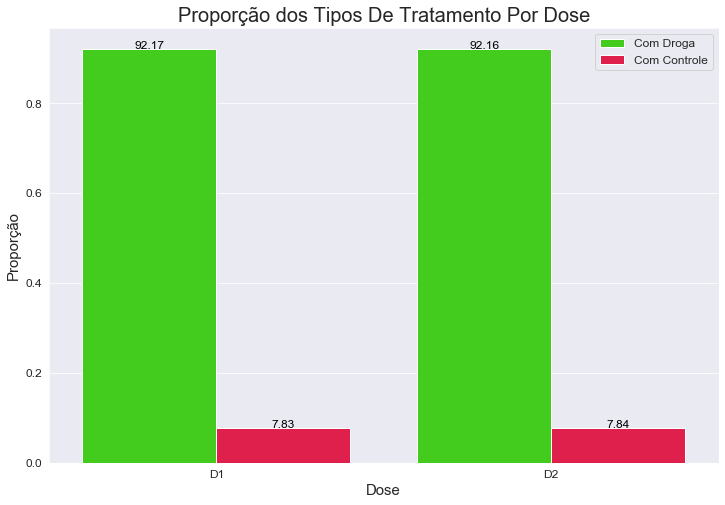

In [19]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("prism", 2))

#Criando o gráfico
sns.barplot(x='dose', y='Proporcao', hue='tratamento', data=dados_group_dose, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Proporção dos Tipos De Tratamento Por Dose', fontsize=20)
plt.xlabel('Dose', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#Adicionando os valores acima da barra
dict_loc = {0:-0.2, 1:0.2, 2:0.8, 3:1.2}
for index, row in dados_group_dose.iterrows():
    ax.text(dict_loc[index], row['Proporcao'], round(row['Proporcao']*100,2), color='black', ha="center", fontsize=12)
    
#Mostrando o gráfico
plt.show()

In [20]:
#Agrupando por tempo e comparando a proporção de tratamento
dados_group_tempo = dados_exp.groupby('tempo')['tratamento'].value_counts(normalize=True)
dados_group_tempo = dados_group_tempo.reset_index(name='Proporcao')
dados_group_tempo['tratamento'] = dados_group_tempo['tratamento'].str.replace('com_droga', 'Com Droga')
dados_group_tempo['tratamento'] = dados_group_tempo['tratamento'].str.replace('com_controle', 'Com Controle')
dados_group_tempo

,tempo,tratamento,Proporcao
0,24,Com Droga,0.922028
1,24,Com Controle,0.077972
2,48,Com Droga,0.921455
3,48,Com Controle,0.078545
4,72,Com Droga,0.921458
5,72,Com Controle,0.078542


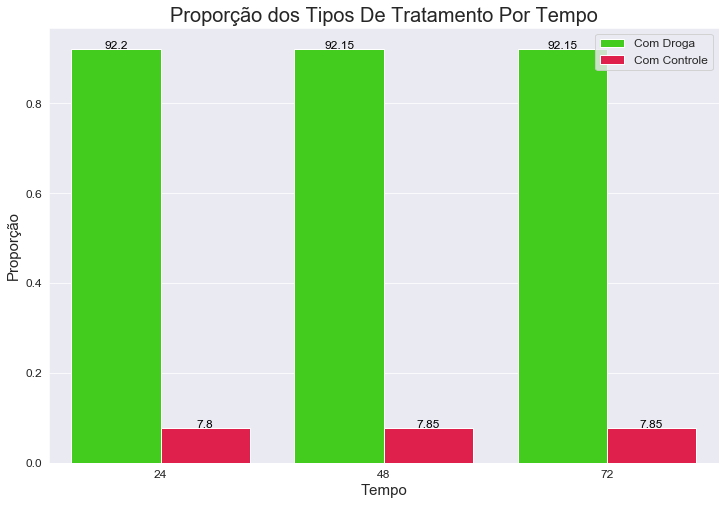

In [21]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#criando uma palheta de 2 cores
sns.set_palette(sns.color_palette("prism", 2))

#Criando o gráfico
sns.barplot(x='tempo', y='Proporcao', hue='tratamento', data=dados_group_tempo, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Proporção dos Tipos De Tratamento Por Tempo', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Proporção', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

#Adicionando os valores acima da barra
dict_loc = {0:-0.2, 1:0.2, 2:0.8, 3:1.2, 4:1.8, 5:2.2}
for index, row in dados_group_tempo.iterrows():
    ax.text(dict_loc[index], row['Proporcao'], round(row['Proporcao']*100,2), color='black', ha="center", fontsize=12)
    
#Mostrando o gráfico
plt.show()

É possível perceber que independente de ser controle as proporções de tempo e dose continuam as mesmas, o que é de se esperar e que indica que os dados estão bem distribuídos

#### 2.1.2-Análise variáveis numéricas

Ao se trabalhar com variáveis numéricas para realizar modelos de previsões estatísticas preisamos entender sua distribuição, para verificar como os valores se concentram, se estão normalizados ou identificar possíveis valores discrepantes(outliers)

Vamos selecionar 9 variáveis aleatórias que as expressões gênicas(prefixo g) e checar sua distribuição.

In [22]:
i = 0
for column in dados_exp.select_dtypes('float64').columns:
    if column[0] == 'g':  
        i+=1
print(i)

772


Percebemos que temos 772 colunas com prefixo g, entao sortearemos 9 números entre 0 e 771

In [23]:
np.random.seed(246)
np.random.randint(0,771,9)

array([158, 644, 233,  64, 558, 290, 120, 615, 378])

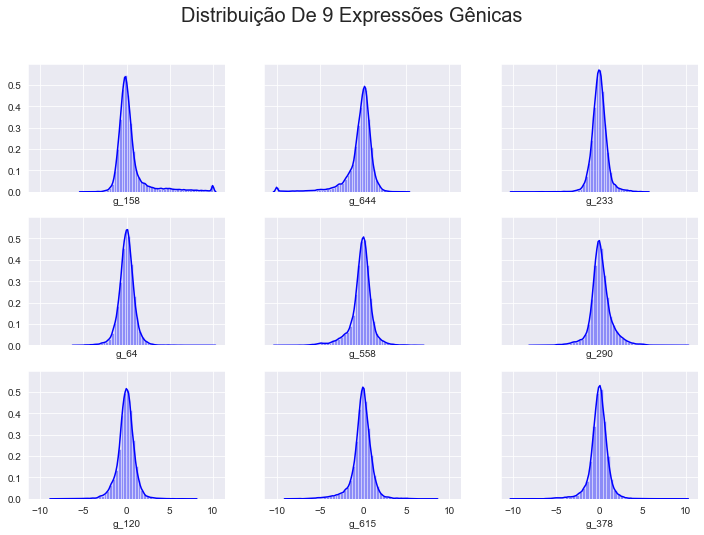

In [24]:
#Criando figura e eixos
fig, ax = plt.subplots(3, 3, figsize=(12,8), sharey=True, sharex=True) 

#Criando o gráfico
sns.distplot(dados_exp['g_158'], ax=ax[0,0],color='b')
sns.distplot(dados_exp['g_644'], ax=ax[0,1],color='b')
sns.distplot(dados_exp['g_233'], ax=ax[0,2],color='b')
sns.distplot(dados_exp['g_64'], ax=ax[1,0],color='b')
sns.distplot(dados_exp['g_558'], ax=ax[1,1],color='b')
sns.distplot(dados_exp['g_290'], ax=ax[1,2],color='b')
sns.distplot(dados_exp['g_120'], ax=ax[2,0],color='b')
sns.distplot(dados_exp['g_615'], ax=ax[2,1],color='b')
sns.distplot(dados_exp['g_378'], ax=ax[2,2],color='b')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Distribuição De 9 Expressões Gênicas', fontsize=20)
    
#Mostrando o gráfico
plt.show()

Percebemos que todas as variáveis possuem uma distribuição muito parecida se aproximando de uma distribuição normal, vamos analisar as variáveis que indicam a viabilidade celular(prefixo c) para verificar se segue o mesmo comportamento.

In [25]:
i = 0
for column in dados_exp.select_dtypes('float64').columns:
    if column[0] == 'c':  
        i+=1
print(i)

100


In [26]:
np.random.seed(246)
np.random.randint(0,99,9)

array([36, 30,  4, 64, 46,  9, 34, 27, 65])

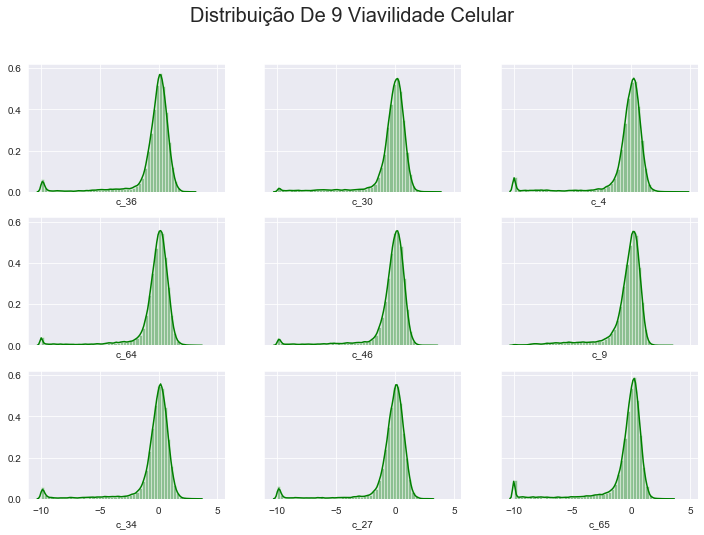

In [27]:
#Criando figura e eixos
fig, ax = plt.subplots(3, 3, figsize=(12,8), sharey=True, sharex=True) 

#Criando o gráfico
sns.distplot(dados_exp['c_36'], ax=ax[0,0],color='g')
sns.distplot(dados_exp['c_30'], ax=ax[0,1],color='g')
sns.distplot(dados_exp['c_4'], ax=ax[0,2],color='g')
sns.distplot(dados_exp['c_64'], ax=ax[1,0],color='g')
sns.distplot(dados_exp['c_46'], ax=ax[1,1],color='g')
sns.distplot(dados_exp['c_9'], ax=ax[1,2],color='g')
sns.distplot(dados_exp['c_34'], ax=ax[2,0],color='g')
sns.distplot(dados_exp['c_27'], ax=ax[2,1],color='g')
sns.distplot(dados_exp['c_65'], ax=ax[2,2],color='g')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Distribuição De 9 Viavilidade Celular', fontsize=20)
    
#Mostrando o gráfico
plt.show()

Percebemos que todas as variáveis também possuem uma distribuição muito parecida com uma distribuição normal, podendo indicar que os dados já passaram por algum tratamento e normalização.

Para entender a correlação entre essas variáveis com prefixo g e c podemos criar um mapa de calor.

In [28]:
#Criando matriz de correlação
corr = dados_exp.corr()
corr.head()

,tempo,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
tempo,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.056778,-0.053159,-0.079995,-0.032101,-0.064898,-0.112583,-0.067116,-0.067969,-0.088916,-0.075736
g_0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g_1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g_2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g_3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579


Para analisar melhor vamos pegar as 100 primeiras variáveis com prefixo g pois são muitas colunas para analisar

In [29]:
coor_g_c = corr.loc['g_0':'g_99','c_0':]
coor_g_c.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
g_0,-0.624116,-0.624810,-0.639789,-0.604041,-0.606231,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,...,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g_1,-0.037405,-0.030558,-0.039616,0.011899,-0.027014,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,...,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g_2,-0.168656,-0.178692,-0.176733,-0.156894,-0.180127,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,...,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g_3,-0.037342,-0.093505,-0.085298,-0.029079,-0.065964,-0.054947,-0.118651,-0.031232,-0.060544,-0.098435,...,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
g_4,-0.403545,-0.379840,-0.392841,-0.357850,-0.365118,-0.384914,-0.364633,-0.378776,-0.383263,-0.346834,...,-0.387193,-0.361679,-0.351508,-0.397062,-0.388885,-0.378084,-0.379085,-0.394904,-0.366693,-0.390581


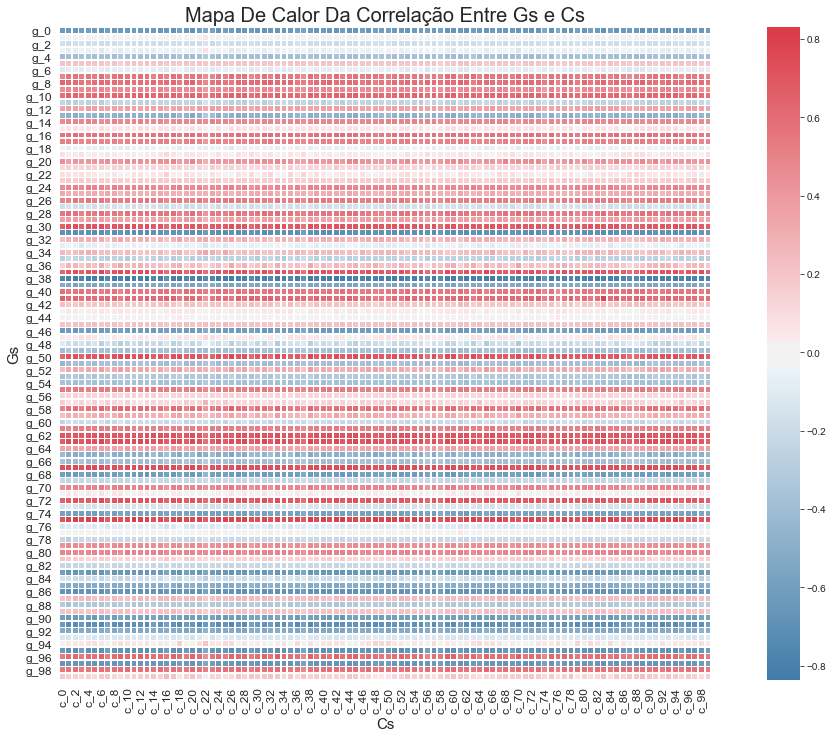

In [30]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize = (20,12))

#Gerando a palheta de cores
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Mudando o estilo de fundo
sns.set_style('white')

#Criando o mapa de calor
sns.heatmap(coor_g_c, cmap=cmap, center=0,square=True, linewidths=.6, ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Mapa De Calor Da Correlação Entre Gs e Cs', fontsize=20)
plt.ylabel('Gs', fontsize=15)
plt.xlabel('Cs', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

A partir do gráfico de calor mostrando a correlação das variáveis podemos notar um padrão, as linhas sempre tem as mesmas cores, isso significa que para mesma expressão gênica todas as viabilidades celulares tem aparamente a mesma correlação, isso não necessariamnete indica causalidade, porém é um forte indicativo que essas variáveis com um valor absoluto da correlação maior provavelmente tem mais peso na hora de prever se houve ou não houve ação desses compostos.

Partindo desse pressuposto podemos pegar a média dessa correlações para cada expressão gênica com a finalidade de achar as mais correlatadas com a viabilidade celular

In [31]:
mean_corr = coor_g_c.apply(np.mean,axis=1)
mean_corr

g_0    -0.631129
g_1    -0.012740
g_2    -0.174736
g_3    -0.058032
g_4    -0.379104
          ...   
g_95   -0.668142
g_96    0.588430
g_97   -0.648142
g_98    0.569917
g_99    0.147824
Length: 100, dtype: float64

In [32]:
top9_g = mean_corr.iloc[mean_corr.abs().argsort()].tail(9)
top9_g

g_31   -0.687628
g_72    0.687636
g_50    0.688680
g_37    0.692545
g_62    0.697331
g_63    0.713587
g_67    0.721285
g_75    0.758371
g_38   -0.790085
dtype: float64

Essas 9 expressões são as que mais tem correlação absoluta média, para enxergar essa relação pode se observar scatterplots com uma das viabilidades, por exemplo a c_0

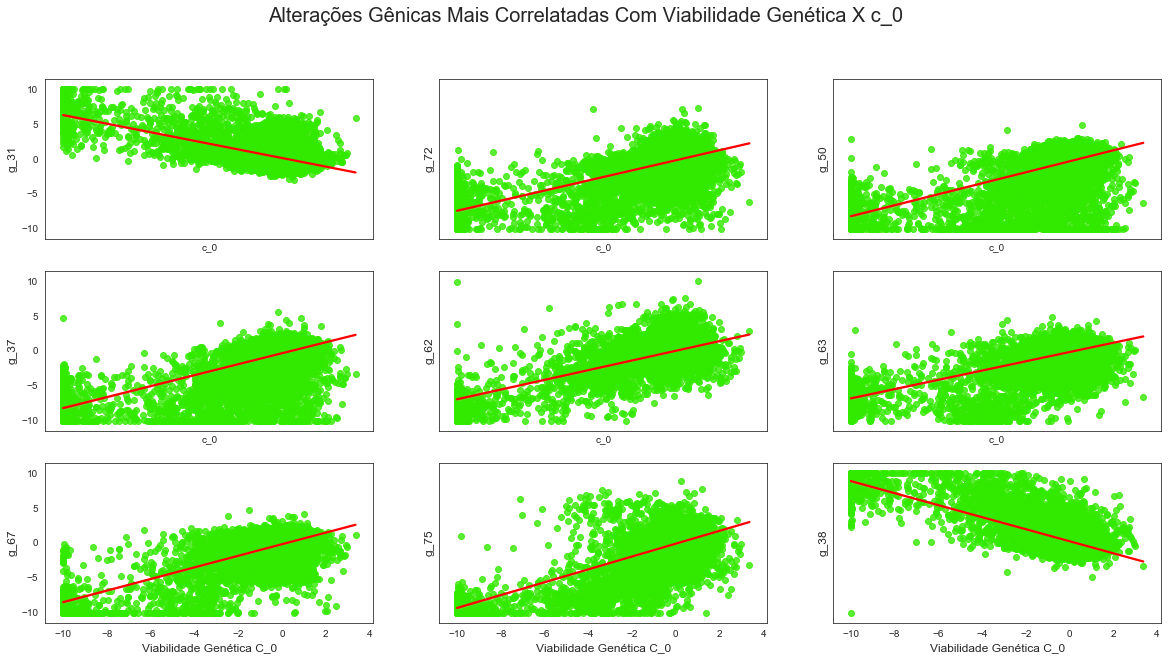

In [33]:
#Criando a figura
fig, ax = plt.subplots(3,3,figsize = (20,10), sharex=True, sharey=True)

#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"))

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.regplot(y=top9_g.index[0], x='c_0', data=dados_exp, ax=ax[0,0], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[1], x='c_0', data=dados_exp, ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[2], x='c_0', data=dados_exp, ax=ax[0,2], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[3], x='c_0', data=dados_exp, ax=ax[1,0], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[4], x='c_0', data=dados_exp, ax=ax[1,1], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[5], x='c_0', data=dados_exp, ax=ax[1,2], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[6], x='c_0', data=dados_exp, ax=ax[2,0], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[7], x='c_0', data=dados_exp, ax=ax[2,1], line_kws={'color':'red'})
sns.regplot(y=top9_g.index[8], x='c_0', data=dados_exp, ax=ax[2,2], line_kws={'color':'red'})

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Alterações Gênicas Mais Correlatadas Com Viabilidade Genética X c_0', fontsize=20)

ax[0,0].set_ylabel(top9_g.index[0], fontsize=12)
ax[0,1].set_ylabel(top9_g.index[1], fontsize=12)
ax[0,2].set_ylabel(top9_g.index[2], fontsize=12)
ax[1,0].set_ylabel(top9_g.index[3], fontsize=12)
ax[1,1].set_ylabel(top9_g.index[4], fontsize=12)
ax[1,2].set_ylabel(top9_g.index[5], fontsize=12)
ax[2,0].set_ylabel(top9_g.index[6], fontsize=12)
ax[2,1].set_ylabel(top9_g.index[7], fontsize=12)
ax[2,2].set_ylabel(top9_g.index[8], fontsize=12)


ax[2,0].set_xlabel('Viabilidade Genética C_0', fontsize=12)
ax[2,1].set_xlabel('Viabilidade Genética C_0', fontsize=12)
ax[2,2].set_xlabel('Viabilidade Genética C_0', fontsize=12)

#Mostrando o gráfico
plt.show()

A partir dos gráficos acima percebe se que tem as expressões gênicas possuem comportamentos específicos quando comparados a uma viabilidade celular, nota se que cada expressão apresenta um padrão em relacão ao 'c_0', tomando como base o 'g_38' que possui uma correlação média entre as viabilidades celulares de -0.79 vamos analisar os compostos onde essa alteração esteve mais presente 

In [34]:
dads_g_38 = dados_exp[['composto', 'g_38']]
dads_g_38 = dads_g_38.groupby('composto').agg({'g_38':'mean'})
dads_g_38.iloc[dads_g_38['g_38'].abs().argsort()].tail(9)

,g_38
composto,
ad2da4efe,8.016000
3d75ef235,8.129333
4b798dda1,8.497500
e01990392,8.716667
bbfef20b7,8.842500
91dc8bab8,9.004167
161572520,10.000000
06787fefe,10.000000
379302187,10.000000


Percebe se que essa expressão gênica atingiu valores muito altos se comparado com outras expressões, podendo ser um alto indicativo de ativaçaão de mecanismos

Para analisar mais dessa expressão analisaremos sobre os 10 compostos mais utilizados

In [35]:
top5_compostos = dados_exp['composto'].value_counts().index[:5]
top5_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

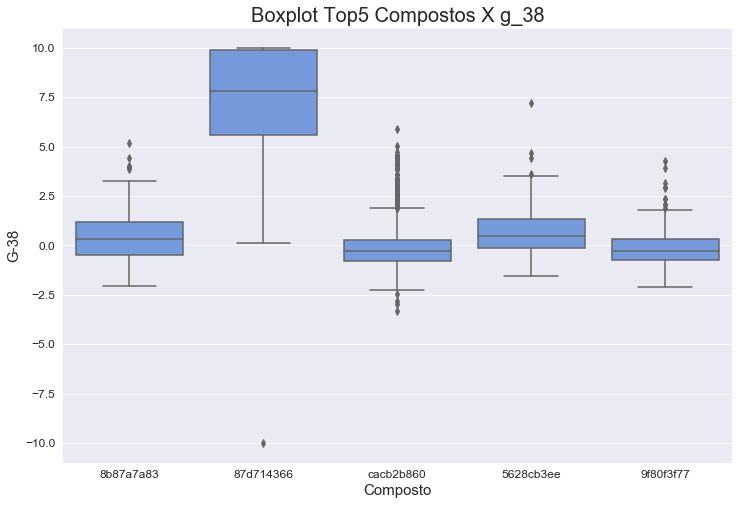

In [36]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.boxplot(x='composto', y='g_38', data=dados_exp.loc[dados_exp['composto'].isin(top5_compostos)], ax=ax, color='cornflowerblue')

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Boxplot Top5 Compostos X g_38', fontsize=20)
plt.ylabel('G-38', fontsize=15)
plt.xlabel('Composto', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

Analisando o boxplot fica evidente que o composto '87d14366' distoa dos demais em relação aos outros compostos, o que pode ser um forte indicativo que essa droga ativou algum mecanisnmo, outro ponto interessante é comparar com o composto do grupo de controle('cacb2b860') se comportou que ao contrário do composto '87d14366' esteve muito concentrado perto do zero 

## 2.2-Análise e Limpeza Dos Dados (dados dos resultados)

In [37]:
#Identificando valores faltando
dados_result.isna().values.any()

False

In [38]:
dados_result.shape

(23814, 207)

Analisando o shape da tabela nota se que temos a mesma quantidade de linhas que a tabela de experimentos(23814) e 207 colunas

In [39]:
dados_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observando as 5 primeiras linhas é possível perceber que a tabela possui a coluna id como a tabela de experimentos e o resto apenas 0s, vamos checar os valores únicos dessas outras colunas

In [40]:
np.unique(dados_result.iloc[:,1:].values)

array([0, 1], dtype=int64)

Vemos que tabela é composta de 0s e 1s, o que indica valores verdadeiros(1) e falsos(0), a partir disso conclui se que o nome da coluna corresponde ao mecanismo de ativação(MOA) e 1 significa que determinado mecanismo foi ativado

Se notarmos os nomes da coluna vemos que no final sempre tem um nome indicando o tipo daquele mecanismo(como 'inhibitor' e 'agonist'), para entender melhor os dados vamos ver os principais tipos desses mecanimos

In [41]:
dados_moa = dados_result.drop('id', axis=1).sum().sort_values(ascending=False).reset_index()
dados_moa.columns = ['MOA', 'quantidade']
dados_moa.head()

,MOA,quantidade
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404


In [42]:
list_acao = []

moa_split = dados_moa['MOA'].str.split('_')
for row in moa_split:
    list_acao.append(row[-1])
dados_moa['acao'] = list_acao
dados_moa.head()

,MOA,quantidade,acao
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist


In [43]:
top_10_acoes = dados_moa.groupby('acao').agg({'quantidade':'sum'}).sort_values('quantidade', ascending=False).head(10)
top_10_acoes = top_10_acoes.reset_index()
top_10_acoes

,acao,quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,anti-inflammatory,73
9,immunosuppressant,73


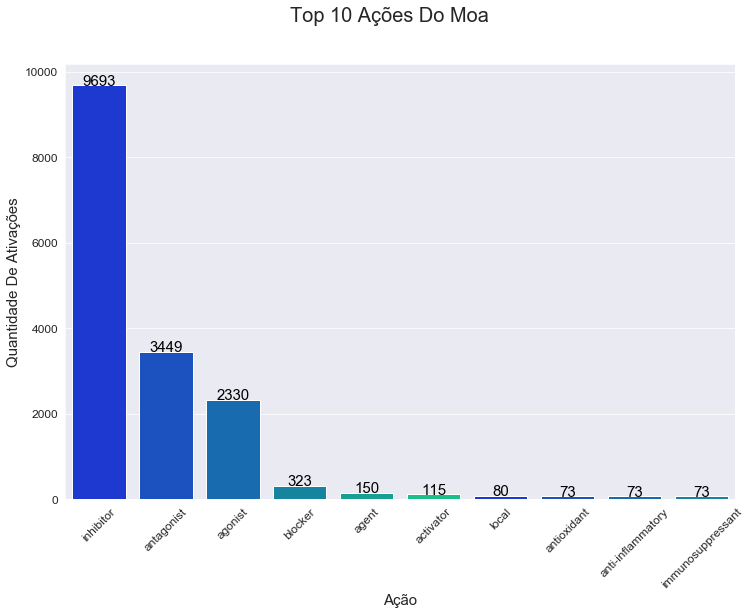

In [44]:
#Criando a figura
fig, ax = plt.subplots(figsize = (12,8))

#Setando a cor
sns.set_palette(sns.color_palette("winter"),10)

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.barplot(data=top_10_acoes, x='acao', y='quantidade', ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Top 10 Ações Do Moa', fontsize=20)
ax.set_xlabel('Ação', fontsize=15)
ax.set_ylabel('Quantidade De Ativações', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Adicionando os valores acima da barra
for index, row in top_10_acoes.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=15)
plt.xticks(rotation= 45)

#Mostrando o gráfico
plt.show()

Claramente o tipo de MOA mais ativado é de inibição, tal informação pode indicar que a maior parte dos compostos de alguma forma causa alguma inibição, o que dependendo do alvo da pesquisa pode ser mais fácil achar o padrão para outros mecanismos já que o inibitor parece ser de fácil ocorrência

# 3-Juntar os dados do experimento e resultado

Criando colunas com o números de mecanismos ativados e se teve ou não algum ativado 

In [45]:
dados_result['n_moa'] = dados_result.drop('id', axis=1).sum(axis=1)

In [46]:
dados_result['ativo_moa'] = dados_result['n_moa'] != 0

In [47]:
dados_comb = dados_exp.merge(dados_result[['id', 'n_moa', 'ativo_moa']], on='id')

In [48]:
dados_comb.head()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Tranformando colunas de classificação em várias colunas binárias(0 e 1)

In [49]:
#transformando tempo em categoria
dados_comb['tempo'] = dados_comb['tempo'].astype('category')

In [50]:
dados_comb = pd.get_dummies(dados_comb, columns=['tratamento', 'dose', 'tempo'])

In [51]:
dados_comb

,id,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,...,c_99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.4680,1,True,0,1,0,1,1,0,0
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.3689,1,True,0,1,0,1,1,0,0
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.3808,0,False,1,0,0,1,0,1,0
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.0740,1,True,0,1,1,0,1,0,0


Agora que temos acesso aos resultados podemos comparar as hipóteses levantadas na fase do estudo da correlação para verificar se realmente uma maior variação nas expressões gênicas com maior correlação com a viabilidade genética indica que ativou ou não algum mecanismo de ação.

In [52]:
top9_g

g_31   -0.687628
g_72    0.687636
g_50    0.688680
g_37    0.692545
g_62    0.697331
g_63    0.713587
g_67    0.721285
g_75    0.758371
g_38   -0.790085
dtype: float64

In [53]:
dados_group_top = dados_comb.groupby('ativo_moa')[top9_g.index].mean()
dados_group_top = dados_group_top.T
dados_group_top['diff_abs'] = abs(dados_group_top[True] - dados_group_top[False])
dados_group_top

ativo_moa,False,True,diff_abs
g_31,0.183475,0.511009,0.327534
g_72,-0.100195,-0.632698,0.532503
g_50,-0.209273,-0.833585,0.624312
g_37,-0.233362,-0.848778,0.615416
g_62,0.017018,-0.373743,0.390760
g_63,-0.095505,-0.568002,0.472496
g_67,-0.238942,-0.660804,0.421862
g_75,-0.157040,-0.632350,0.475311
g_38,0.237511,0.726934,0.489423


In [54]:
piores9_g = mean_corr.iloc[mean_corr.abs().argsort()].head(9)
dados_group_piores = dados_comb.groupby('ativo_moa')[piores9_g.index].mean()
dados_group_piores = dados_group_piores.T
dados_group_piores['diff_abs'] = abs(dados_group_piores[True] - dados_group_piores[False])
dados_group_piores

ativo_moa,False,True,diff_abs
g_77,-0.130722,-0.062992,0.067730
g_44,0.027438,-0.023395,0.050833
g_1,-0.126930,-0.075425,0.051505
g_71,-0.093795,-0.160837,0.067042
g_43,0.088592,0.011366,0.077226
g_19,-0.085392,-0.081419,0.003973
g_47,-0.103032,0.140458,0.243490
g_94,-0.051449,-0.004128,0.047320
g_22,-0.035440,0.101355,0.136795


A partir dessa análise é possível confirmar que a correlação entre a expressão gênica e a viabilidade celular é um fator que deve ser levado em conta, uma vez que a variação dessas expressões entre o grupo que ativou e o grupo que não ativou foi muito maior nas expressões mais correlacionadas com a viabilidade celular do que nas expressões pouco correlacionadas. Enquanto no primeiro caso essa diferença ficou entre 32.7% e 48.9%, no segundo caso ficou entre 0.39% e 24.3%.

Essa conclusão indica que podemos extrair padrões dos dados e para nos ajudar a achar esses padrões a fim de medir novos conjuntos de dados utilizaremos algoritmos de machine learning.

# 4-Modelo de Machine Learning

## 4.1-Modelo de predição se ativou ou não ativou algum MOA

#### 4.1.1-Definição do problema

Primeira fase na hora de começar um modelo de machine learning é entender a natureza dos dados, nesse caso nós temos diversos atributos e se quisermos descobrir se determinado composto ativou ou não algum mecanismo de ação estaremos trabalhando em uma classificação binária(0 ou 1), temos diversos modelos capazes de fazer essa classificação. Iremos testar diversos dele e comparar as métricas de 

### 4.1.2-Testes dos modelos(dummy classifier, regressão logística, árvore de decisão, random forest, SVC)

In [161]:
modelos=['Dummy', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'SVC']

In [96]:
#Separando as variáveis em x e y
X_mod_1 = dados_comb.drop(columns=['id', 'composto', 'n_moa', 'ativo_moa'])
y_mod_1 = dados_comb['ativo_moa']

In [121]:
#Criando uma classe para cada modelo
class Model_classifier():
    '''
    classe do modelo de classificação
    '''
    def __init__(self, model, X, y, test_size=0.2, random_state=246, stratify=y, **kwargs):
        '''
        Construtor que divide os dados em treino e teste, treina o modelo, faz a previsão a partir dos dados de teste e calcula a acuracia
        '''
        self.model = model
        self.X_treino, self.X_teste, self.y_treino, self.y_teste = train_test_split(X, y, test_size=test_size, stratify=stratify, random_state=random_state)
        self.model.fit(self.X_treino, self.y_treino)
        self.y_pred = self.model.predict(self.X_teste)
        self.score = self.model.score(self.X_teste, self.y_teste)
        
    def classification_report(self, **kwargs):
        '''
        Função que retorna a acurácia fazendo uma cross validação nos dados de treino
        '''
        return classification_report(self.y_teste, self.y_pred, **kwargs)
    
    def confusion_matrix(self,**kwargs):
        '''
        Função que calcula a matriz de confusão
        '''
        return confusion_matrix(self.y_teste, self.y_pred, **kwargs)
    
    def f1(self, **kwargs):
        '''
        Função que calcula f1 score(resumindo a precisão e o recall)
        '''
        return f1_score(self.y_teste, self.y_pred, **kwargs)

Para entender melhor a dificuldade do problema a ser resolvido o primeiro modelo testado será o 'dummy classifier', ou classificador burro, ele vai tentar acertar a variável target chutando sempre o mais frequente, fazemos isso para ter uma primeira noção de acurácia

In [164]:
dict_metrics_dummy={}
dummy = Model_classifier(DummyClassifier('most_frequent'), X_mod_1, y_mod_1)
dict_metrics_dummy['score'] = dummy.score
dict_metrics_dummy['f1_score_true'] = dummy.f1(labels=[1], average = None)[0]
dict_metrics_dummy['f1_score_false'] = dummy.f1(labels=[0], average = None)[0]
dict_metrics_dummy

{'score': 0.6067604450976275,
 'f1_score_true': 0.7552593754083365,
 'f1_score_false': 0.0}

Podemos ver que esse modelo teve uma acurácia de 60%, ou seja o minímo dos modelos testados é que estejam acima disso, pois se não, não valeria criar outro modelo

In [165]:
dict_metrics_lor={}
lor = Model_classifier(LogisticRegression(max_iter=1000),  X_mod_1, y_mod_1)
dict_metrics_lor['score'] = lor.score
dict_metrics_lor['f1_score_true'] = lor.f1(labels=[1], average = None)[0]
dict_metrics_lor['f1_score_false'] = lor.f1(labels=[0], average = None)[0]
dict_metrics_lor

{'score': 0.6712156204073063,
 'f1_score_true': 0.7586313193588163,
 'f1_score_false': 0.48452929558920343}

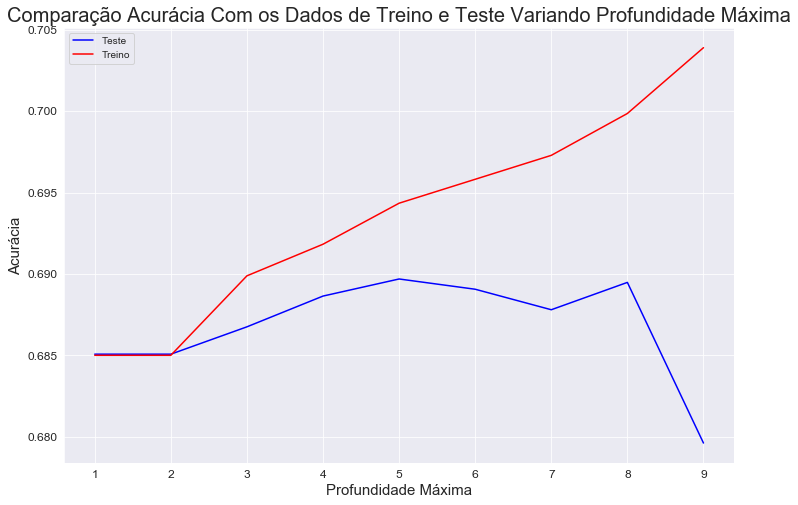

In [145]:
#score_teste = []
#score_treino = []
#for i in range(1,10):
   # tree = Model_classifier(DecisionTreeClassifier(max_depth=i),  X_mod_1, y_mod_1)
   # score_teste.append(tree.score)
  #  score_treino.append(tree.model.score(tree.X_treino, tree.y_treino))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.lineplot(x=range(1,10), y=score_teste, color='b', label='Teste', ax=ax)
sns.lineplot(x=range(1,10), y=score_treino, color='r', label='Treino', ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Comparação Acurácia Com os Dados de Treino e Teste Variando Profundidade Máxima', fontsize=20)
plt.ylabel('Acurácia', fontsize=15)
plt.xlabel('Profundidade Máxima', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
    
#Mostrando o gráfico
plt.show()

Podemos notar que a acurácia do modelo tem seu ápice nos dados de teste quando a profundida máxima está igual a 5, podemos notar que depois disso ela sobe muito para os dados de treino e cai para os dados de teste, o que acontece nesse caso é um fenômeno conhecido como 'overfitting', que acontece quando o modelo aumenta a complexidade e aprende demais sobre os dados de treino e quando recebe novos dados não consegue se sair bem, por esta razão precisamos separar os dados a fim de comparação.

A partir dessas conclusões estaremos utilizando o parâmetro de profundidade máxima igual a 5.

In [146]:
dict_metrics_tree={}
tree = Model_classifier(DecisionTreeClassifier(max_depth=5),  X_mod_1, y_mod_1)
dict_metrics_tree['score'] = tree.score
dict_metrics_tree['f1_score_true'] = tree.f1(labels=[1], average = None)[0]
dict_metrics_tree['f1_score_false'] = tree.f1(labels=[0], average = None)[0]
dict_metrics_tree

{'score': 0.6901112744068865,
 'f1_score_true': 0.7956244807532541,
 'f1_score_false': 0.35937499999999994}

In [147]:
dict_metrics_forest={}
forest = Model_classifier(RandomForestClassifier(max_depth=5),  X_mod_1, y_mod_1)
dict_metrics_forest['score'] = forest.score
dict_metrics_forest['f1_score_true'] = forest.f1(labels=[1], average = None)[0]
dict_metrics_forest['f1_score_false'] = forest.f1(labels=[0], average = None)[0]
dict_metrics_forest

{'score': 0.6909510812513122,
 'f1_score_true': 0.7968534363786917,
 'f1_score_false': 0.3543859649122807}

In [148]:
dict_metrics_svc={}
svc = Model_classifier(SVC(),  X_mod_1, y_mod_1)
dict_metrics_svc['score'] = svc.score
dict_metrics_svc['f1_score_true'] = svc.f1(labels=[1], average = None)[0]
dict_metrics_svc['f1_score_false'] = svc.f1(labels=[0], average = None)[0]
dict_metrics_svc

{'score': 0.6949401637623347,
 'f1_score_true': 0.7975477218893688,
 'f1_score_false': 0.38143891017454234}

In [166]:
pd.DataFrame([dict_metrics_dummy, dict_metrics_lor, dict_metrics_tree, dict_metrics_forest,dict_metrics_svc], index=modelos)

,score,f1_score_true,f1_score_false
Dummy,0.606760,0.755259,0.000000
Regressão Logística,0.671216,0.758631,0.484529
Árvore de Decisão,0.690111,0.795624,0.359375
Random Forest,0.690951,0.796853,0.354386
SVC,0.694940,0.797548,0.381439


### 4.1.3-Escolha do modelo(analisando as métricas de acurácia e f1 score )

A partir da análise das métricas dos modelos o modelo escolhido será o último(Support Vector Classification), foi o modelo que obteve melhor acurácia e melhor desempenho no f1_score_true, para visualizar o que isso significa vamos analisar a 'confusion matrix' e  a 'classificantion_report'

In [158]:
svc.confusion_matrix()

array([[ 448, 1425],
       [  28, 2862]], dtype=int64)

In [159]:
print(svc.classification_report())

              precision    recall  f1-score   support

       False       0.94      0.24      0.38      1873
        True       0.67      0.99      0.80      2890

    accuracy                           0.69      4763
   macro avg       0.80      0.61      0.59      4763
weighted avg       0.78      0.69      0.63      4763



Reparamos que 94% das vezes que o modelo previu que o composto não ativou o modelo estava certo, o maior problema foi que muitas vezes ele previu que tinha ativado porém não tinha ativado. 

Por mais que o resultado ainda não foi perfeito esse modelo na verdade pode poupar tempo na hora de filtrar os compostos que não ativaram, pois 94% das vezes que ele prevê que não ativou realmente não ativou.

##    4.2-Modelo de predição para prever o tipo de tratamento

### 4.2.1-Definição do problema

A proposta desse segundo modelo será prever se o experimento foi um experimento realizado com controle ou se foi submetido a algum composto, podemos interpretar o problema como uma classificação binária, uma vez que o modelo precisa prever se o experimento foi com controle ou não foi(0 ou 1), o 1 nesse caso indicará controle e 0 com composto. 

### 4.2.2-Testes dos modelos(dummy classifier, regressão logística, árvore de decisão, random forest, SVC)

In [125]:
X_controle = dados_comb.drop(columns = ['id', 'composto', 'n_moa', 'ativo_moa','tratamento_com_droga', 'tratamento_com_controle'])
y_controle = dados_comb['tratamento_com_controle']

In [149]:
dict_metrics_dummy_2={}
dummy_2 = Model_classifier(DummyClassifier('most_frequent'), X_controle, y_controle)
dict_metrics_dummy_2['score'] = dummy_2.score
dict_metrics_dummy_2['f1_score_true'] = dummy_2.f1(labels=[1], average = None)[0]
dict_metrics_dummy_2['f1_score_false'] = dummy_2.f1(labels=[0], average = None)[0]
dict_metrics_dummy_2

{'score': 0.9216880117572959,
 'f1_score_true': 0.0,
 'f1_score_false': 0.9592483338796023}

In [150]:
dict_metrics_lor_2={}
lor_2 = Model_classifier(LogisticRegression(max_iter=1000),  X_controle, y_controle)
dict_metrics_lor_2['score'] = lor_2.score
dict_metrics_lor_2['f1_score_true'] = lor_2.f1(labels=[1], average = None)[0]
dict_metrics_lor_2['f1_score_false'] = lor_2.f1(labels=[0], average = None)[0]
dict_metrics_lor_2

{'score': 0.9468822170900693,
 'f1_score_true': 0.6640106241699868,
 'f1_score_false': 0.971161518294768}

In [151]:
dict_metrics_tree_2={}
tree_2 = Model_classifier(DecisionTreeClassifier(max_depth=5),  X_controle, y_controle)
dict_metrics_tree_2['score'] = tree_2.score
dict_metrics_tree_2['f1_score_true'] = tree_2.f1(labels=[1], average = None)[0]
dict_metrics_tree_2['f1_score_false'] = tree_2.f1(labels=[0], average = None)[0]
dict_metrics_tree_2

{'score': 0.9239974805794667,
 'f1_score_true': 0.34420289855072467,
 'f1_score_false': 0.9596612435926009}

In [152]:
dict_metrics_forest_2={}
forest_2 = Model_classifier(RandomForestClassifier(max_depth=5),  X_controle, y_controle)
dict_metrics_forest_2['score'] = forest_2.score
dict_metrics_forest_2['f1_score_true'] = forest_2.f1(labels=[1], average = None)[0]
dict_metrics_forest_2['f1_score_false'] = forest_2.f1(labels=[0], average = None)[0]
dict_metrics_forest_2

{'score': 0.922737770312828,
 'f1_score_true': 0.026455026455026457,
 'f1_score_false': 0.9597726278968081}

In [153]:
dict_metrics_svc_2={}
svc_2 = Model_classifier(SVC(),  X_controle, y_controle)
dict_metrics_svc_2['score'] = svc_2.score
dict_metrics_svc_2['f1_score_true'] = svc_2.f1(labels=[1], average = None)[0]
dict_metrics_svc_2['f1_score_false'] = svc_2.f1(labels=[0], average = None)[0]
dict_metrics_svc_2

{'score': 0.9582196094898173,
 'f1_score_true': 0.6795491143317232,
 'f1_score_false': 0.9776530039303761}

In [167]:
pd.DataFrame([dict_metrics_dummy_2, dict_metrics_lor_2, dict_metrics_tree_2, dict_metrics_forest_2,dict_metrics_svc_2], index=modelos)

,score,f1_score_true,f1_score_false
Dummy,0.921688,0.000000,0.959248
Regressão Logística,0.946882,0.664011,0.971162
Árvore de Decisão,0.923997,0.344203,0.959661
Random Forest,0.922738,0.026455,0.959773
SVC,0.958220,0.679549,0.977653


### 4.2.3-Escolha do modelo(analisando as métricas de acurácia e f1 score )

Observando as tabelas com as métricas é possível perceber que o modelo SVC(Support Vector Classification) foi o que teve melhor rendimento em todas elas, e dessa vez comseguimos uma acurácia muito boa de 95% para prever se um experimento foi feito com controle ou teve algum composto submetido.

# 5-Conclusões

A partir do projeto foi possível tirar conclusões interessantes e aprender mais sobre esse mundo da farmacologia, o primeiro conhecimento é sobre o tipo de tratamento, a partir da proporção dos dados dessa classe foi possível notar um padrão no meio científico que é a criação de um experimento controle que pode ser comparados com outros experimentos quando submetidos as mesmas condições mais com atuação de um composto. 

Outra conclusão foi perceber que a proporção de doses e tempos são proporcionais, ou seja, os experimentos são distribuídos de forma igual nessa variáveis indicando que o tempo e a dose são fatores importantes que precisam ser estudados experimentos variados.

Uma das conclusões mais interessantes que é possível extrair dos dados é saber que a ação mais comum de um composto é a inibição de algum receptor, ou seja, muitos remédios agem dessa maneira.

Por fim podemos tirar conclusões através dos modelos contruídos, que um modelo anda tem dificuldades em prever se ativou ou não ativou algum mecanismo de ação mas é muito eficaz para ajudar por exemplo para descobrir o tipo de tratamento, porém o mais importantes é ter noção que a tecnologia está mudando o mundo e com certeza a farmacologia é uma das áreas que está sendo beneficiada e será muito mais, entender o poder que o python e suas bibliotecas fornecem ao cientista de dados é algo impressionante e que está mudadando a forma de pensar.

# Bibliografia de referência

https://www.prnewswire.com/news-releases/data-science-to-accelerate-drug-discovery-with-artificial-intelligence-and-machine-learning-says-frost--sullivan-301140011.html

https://en.wikipedia.org/wiki/Drug_discovery

https://anestesiologia.paginas.ufsc.br/files/2015/02/Farmacodinamica-texto.pdf

https://www.mpibpc.mpg.de/14096617/Blau-Christian_2013_PhD-thesis_Goe.pdf

https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit

https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view